In [6]:
from pynq import PL
from pynq import Overlay
from pynq import allocate

import numpy as np
import matplotlib.pyplot as plt

In [7]:
PL.reset()
xadc_stream = Overlay('circular_1.bit')

dma    = xadc_stream.axi_dma_0
xgpio  = xadc_stream.axi_gpio_0
#xgpiol = xadc_stream.axi_gpio_low
#xgpioh = xadc_stream.axi_gpio_high

In [99]:
xgpio.read(8)

13

In [8]:
xgpio.write(0,2000)

In [96]:
xgpio.write(0,15)

In [80]:
xgpiol.write(0,50000)
xgpioh.write(0,2000000)

In [9]:
input_buffer = allocate(shape=(8300,), dtype=np.uint32)

In [15]:
dma.recvchannel.transfer(input_buffer)
input_buffer1 = input_buffer
for i in range(len(input_buffer1)):
    if input_buffer1[i]>0.5:
        input_buffer1[i] = input_buffer1[i]-1

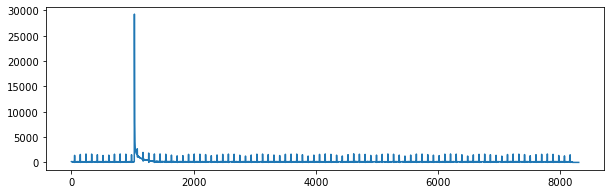

In [16]:
plt.figure(figsize=(10,3))
plt.plot(range(0, 8300), input_buffer1)
##plt.xlim(0, 4000)
plt.show()

In [9]:
print(np.sum(input_buffer))

0


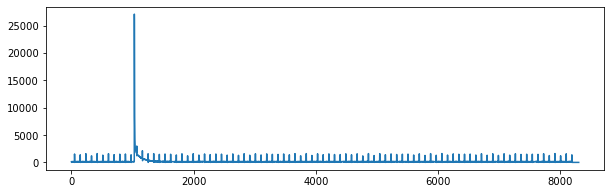

Suma de histograma =  1495623


In [23]:
dma.recvchannel.transfer(input_buffer)
input_buffer1 = input_buffer
for i in range(len(input_buffer1)):
    if input_buffer1[i]>0.5:
        input_buffer1[i] = input_buffer1[i]-1

plt.figure(figsize=(10,3))
#plt.bar(range(0, 8300), input_buffer1)#, edgecolor='black')
plt.plot(range(0, 8300), input_buffer1)
#plt.xlim(200, 300)
plt.show()

#print("Numero de conteos = ", xgpio.read(8))
print("Suma de histograma = ", np.sum(input_buffer))

In [25]:
print(input_buffer)

[25 10  2 ...  0  0  0]
